In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import torch
import os
import random
from functools import partial

In [3]:
# creating random function
random.seed(os.urandom(1))
rand = partial(random.randint, 1, 100)
rand()

94

In [4]:
# creating inputs 
# result = w1*input1 + w2*input2 + b

input1 = [rand() for i in range(100)]
input2 = [rand() for i in range(100)]
result = [6 * input1[i] + 13 * input2[i] + 5 for i in range(100)] # w1 = 6; w2=13; b=5

In [5]:
# creating dataframes from input1, input2 and output

df = pd.DataFrame({"input1":input1, "input2":input2, "result":result})
df.tail()

,input1,input2,result
95,95,56,1303
96,9,80,1099
97,31,26,529
98,54,2,355
99,37,75,1202


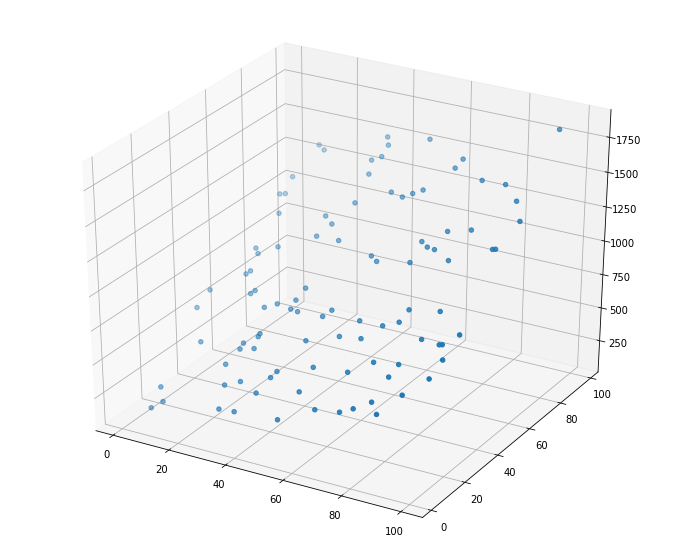

In [50]:
import mpl_toolkits.mplot3d
%matplotlib inline

fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs=input1, ys=input2, zs=result)


In [7]:
## creating tensors from input1, input2 and result

input = torch.tensor([
                        [*input1],
                        [*input2]
                    ],
        dtype=torch.float32)
input = input.t()

output = torch.tensor(result, dtype=torch.float32)
output = torch.reshape(output,(100,1))


In [8]:
# loss function 

def mse_loss(preds, target):
    diff = preds - target
    return torch.sum(diff * diff) / preds.numel()


In [9]:
w = torch.randn(1,2, requires_grad=True) # weight
b = torch.randn(1, requires_grad=True) # bias
w,b

(tensor([[1.3514, 0.1307]], requires_grad=True),
 tensor([0.7802], requires_grad=True))

In [10]:
preds = input @ w.t() + b 
loss = mse_loss(preds, output)
loss

tensor(806196.0625, grad_fn=<DivBackward0>)

In [11]:
loss.backward() # compute gradient

In [12]:
with torch.no_grad():
    w -= w.grad * 0.0001
    b -= b.grad * 0.0001
    w.grad.zero_()  # update the weight
    b.grad.zero_()  # update the bias

In [13]:
history = [] # to store loss 

In [16]:
# train for multiple epochs

epochs = 10000 * 12
lr = 0.0001 
interval = epochs // 10             # interval to print loss
for i in range(1, epochs+1):        # start from 1
    preds = input @ w.t() + b
    loss = mse_loss(preds, output)
    history.append(loss.item())     # append to history
    if i % interval is 0: print("Epoch: {:<6d} loss: {} ".format(i,loss))
    loss.backward()
    with torch.no_grad():
        w -= w.grad * lr
        b -= b.grad * lr
        w.grad.zero_()
        b.grad.zero_()

w,b

Epoch: 0      loss: 0.09594957530498505 
Epoch: 6000   loss: 0.07038338482379913 
Epoch: 12000  loss: 0.05161672458052635 
Epoch: 18000  loss: 0.03786280006170273 
Epoch: 24000  loss: 0.027773285284638405 
Epoch: 30000  loss: 0.020362533628940582 
Epoch: 36000  loss: 0.014940624125301838 
Epoch: 42000  loss: 0.010961056686937809 
Epoch: 48000  loss: 0.008034328930079937 
Epoch: 54000  loss: 0.005894949659705162 


(tensor([[ 6.0017, 13.0017]], requires_grad=True),
 tensor([4.8169], requires_grad=True))

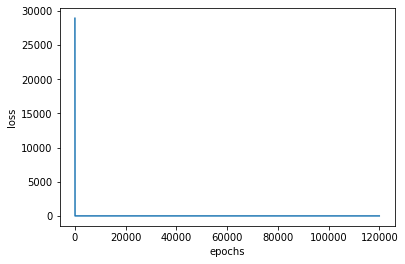

In [17]:
%matplotlib inline
plot_data = pd.DataFrame({"loss":history, "epochs":range(len(history))})
sns.lineplot(x="epochs", y="loss", data=plot_data)


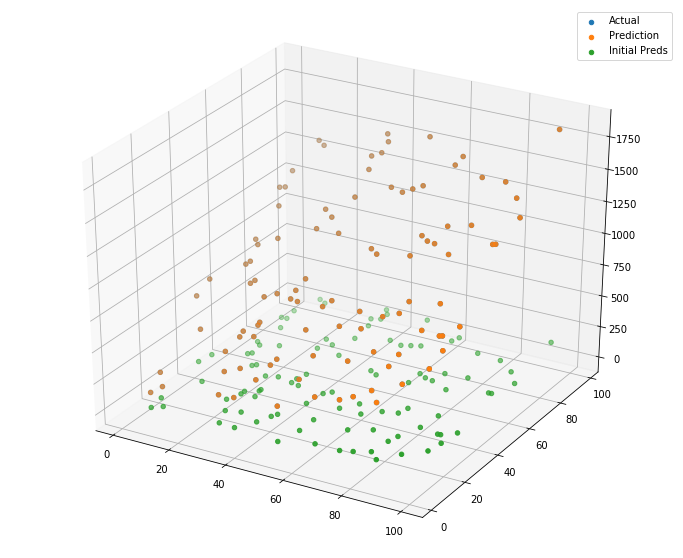

In [42]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection='3d')

#plotting Actual prediction (True value)
ax.scatter(xs=input1, ys=input2, zs=result, label="Actual")

#plottin prediction after Training.
ax.scatter(xs=input1, ys=input2, zs=preds.detach()[:,0], label="Prediction")

#calculating initial prediction (Without training).
initial_w = torch.tensor([[1.3514, 0.1307]])
initial_b = torch.tensor([0.7802])
initial_preds = input @ initial_w.t() + initial_b

#plotting initial prediction
ax.scatter(xs=input1, ys=input2, zs=initial_preds[:,0], label="Initial Preds")
ax.legend()

# As you can see, Prediction overlaps actual dots due to accuracy of model

In [43]:
w,b

(tensor([[ 6.0017, 13.0017]], requires_grad=True),
 tensor([4.8169], requires_grad=True))